In [145]:
import numpy as np
from scipy import signal
import scipy.io.wavfile
import matplotlib.pyplot as plt
import math
from IPython.display import Audio

In [146]:
sourceFilesPrefix="ExpectedResults\\music-"
#sourceFilesPrefix="s"
resultFilesPrefix="AudioResults\\fromExpectedmatlab-"
rate1, sample1_data = scipy.io.wavfile.read(sourceFilesPrefix+"1.wav")
print(sample1_data.std(axis=0))
#plt.figure(1)
#plt.plot(sample1_data)
#plt.title("data1")
#plt.show()

rate2, sample2_data=scipy.io.wavfile.read(sourceFilesPrefix+"2.wav")
print(sample2_data.std(axis=0))
#plt.figure(2)
#plt.plot(sample2_data)
#plt.title("data2")
#plt.show()

5564.16372545
2619.18445716


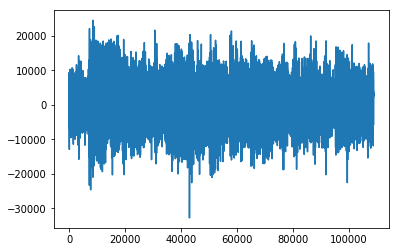

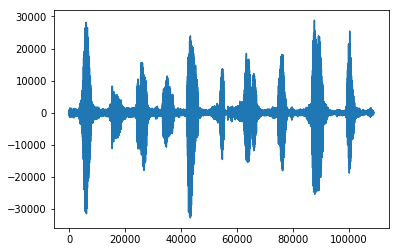

In [147]:
S1=np.c_[sample1_data,sample2_data]
S2=np.c_[sample1_data,sample2_data]

plt.figure(1)
plt.plot(sample1_data)
plt.show()
plt.figure(2)
plt.plot(sample2_data)
plt.show()
#S1/=S1.std(axis=0)
med1=S1.std(axis=0)
S1= S1/med1
#S2/=S2.std(axis=0)
med2=S2.std(axis=0)
S2=S2/med2

mixingMatrix1=np.array([1.1,0.7])
mixingMatrix2=np.array([1.5,0.5])
m=np.matrix([mixingMatrix1,mixingMatrix2])
X1=np.dot(S1,mixingMatrix1.T)
X2=np.dot(S2,mixingMatrix2.T)
#plt.figure(2)
#plt.plot(X1)
#plt.plot(X2)
#plt.show()
X=np.c_[X1,X2]
X=X.T

[[ 0.29989426  0.67575911]
 [ 0.84126214  0.75361794]]


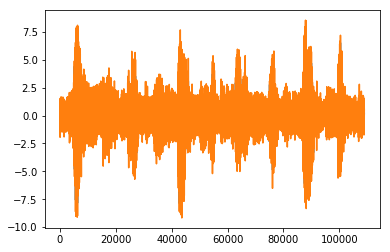

[[ 0.00896153  0.01308471]
 [ 0.00981068  0.01217303]]
2


In [148]:
eta=0.01
eta0=eta
T=1000
num_iter=10000
W=np.random.random(m.shape)/50
A=np.random.random((2,2))
print(A)

med1=sample1_data.std(axis=0)
s1data= sample1_data/med1
med2=sample2_data.std(axis=0)
s2data=sample2_data/med2

orig=np.matrix([s1data,s2data])
X=np.dot(A,orig)
plt.figure(1)
plt.plot(X.T)
plt.show()
print(W)
#print("W "+str(W))
numSrc=X.shape[0]
print(numSrc)
#print(W)
#print(b)

In [149]:
def sigmoid(y):
    #g=np.zeros(y.shape)
    g=np.divide(1,np.add(1,np.exp(-y)))
    #print(g)
    return g

def gradient(eta, Y, W):
    delW=np.zeros(W.shape)
    Z=sigmoid(Y)
    Id=np.identity(Y.shape[0])
    grad=eta*(Id+np.dot((1-2*Z),Y.T))*W
    return grad

In [150]:
print(W)
for i in range(0,num_iter):
    Y=np.dot(W,X)
    delW=gradient(eta,Y,W)
    aux=W+delW
    W=aux
    eta=eta0/(1+(i/T))
    if i%100==0:
        print("delW "+str(delW))
        print("W "+str(W))
    #print("eta "+str(eta))

[[ 0.00896153  0.01308471]
 [ 0.00981068  0.01217303]]
delW [[-0.00436793 -0.00587165]
 [-0.00427083 -0.00576139]]
W [[ 0.0045936   0.00721307]
 [ 0.00553985  0.00641164]]
delW [[ -1.38333668e-05   4.69219829e-06]
 [  9.99420965e-06  -1.03351652e-05]]
W [[ 0.00015123  0.00283704]
 [ 0.00280786  0.00109419]]
delW [[ -2.30325765e-05   1.40660238e-05]
 [  2.29561200e-05  -1.50836181e-05]]
W [[-0.00164012  0.00380679]
 [ 0.0044678  -0.00012114]]
delW [[ -2.90752467e-05   1.83399161e-05]
 [  2.95680680e-05  -1.88424735e-05]]
W [[-0.00436784  0.00551131]
 [ 0.00722554 -0.00189432]]
delW [[ -1.77686632e-05   1.12468090e-05]
 [  1.81090257e-05  -1.15018831e-05]]
W [[-0.00681078  0.00705556]
 [ 0.00971323 -0.00347635]]
delW [[ -6.10032075e-06   3.86344914e-06]
 [  6.21938214e-06  -3.94799271e-06]]
W [[-0.00792928  0.00776375]
 [ 0.01085339 -0.0042003 ]]
delW [[ -1.74239345e-06   1.10361735e-06]
 [  1.77645134e-06  -1.12750439e-06]]
W [[-0.00827645  0.00798364]
 [ 0.01120735 -0.00442497]]
delW [

delW [[ -2.34594512e-11   9.33333937e-12]
 [ -1.73971930e-11   1.66851890e-11]]
W [[-0.00841734  0.00807282]
 [ 0.01135058 -0.00451582]]
delW [[ -2.31289292e-11   9.20183927e-12]
 [ -1.71520900e-11   1.64501145e-11]]
W [[-0.00841734  0.00807282]
 [ 0.01135057 -0.00451582]]
delW [[ -2.28075904e-11   9.07399279e-12]
 [ -1.69137968e-11   1.62215712e-11]]
W [[-0.00841734  0.00807282]
 [ 0.01135057 -0.00451582]]
delW [[ -2.24950575e-11   8.94964981e-12]
 [ -1.66820337e-11   1.59992909e-11]]
W [[-0.00841734  0.00807282]
 [ 0.01135057 -0.00451581]]
delW [[ -2.21909734e-11   8.82866823e-12]
 [ -1.64565357e-11   1.57830194e-11]]
W [[-0.00841735  0.00807282]
 [ 0.01135057 -0.00451581]]
delW [[ -2.18949999e-11   8.71091356e-12]
 [ -1.62370523e-11   1.55725164e-11]]
W [[-0.00841735  0.00807282]
 [ 0.01135057 -0.00451581]]
delW [[ -2.16068170e-11   8.59625841e-12]
 [ -1.60233459e-11   1.53675540e-11]]
W [[-0.00841735  0.00807282]
 [ 0.01135057 -0.00451581]]
delW [[ -2.13261210e-11   8.48458203e-12]

[[-0.00841741  0.00807285]
 [ 0.01135052 -0.00451577]]
[[-0.02156828  0.00896342]
 [-0.0170764   0.01219539]
 [-0.01443037  0.00845056]
 ..., 
 [ 0.02440893  0.00165122]
 [ 0.028124    0.00109372]
 [ 0.02114256 -0.00062615]]


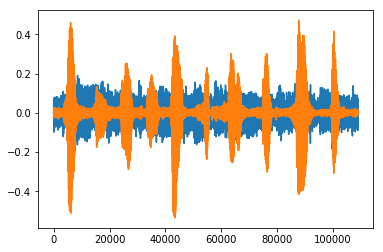

In [151]:
print(W)
#p=np.matrix([W[0],W[1]])
#p[1,1]=0.0268169
#p=p*10
#print(p)
Y2=np.dot(W*10,X)
print(Y2.T)
plt.figure(1)
plt.plot(Y2.T)
plt.show()

In [152]:
Audio(data=X[0], rate=16000)

In [153]:
Audio(data=X[1], rate=16000)


In [154]:
Audio(data=Y2[0]*2, rate=16000)

In [155]:
Audio(data=Y2[1]*2, rate=16000)

In [156]:
Audio(data=sample1_data, rate=16000)

In [157]:
Audio(data=sample2_data, rate=16000)